# Handwritten Digit Recognition using CNN

## Import necessary Librairies

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

##### __Explanation__:
- `tensorflow` and `keras`: Used for building and training the Convutional Neural Network (CNN).

- `minst`: This is the dataset we are using, which contains handwritten digits.

- `matplotlib.pyplot`: Used for visualising training results and sample predictions.

- `numpy`: Helps with numerical operations.

## Load and Preprocess the Data

In [2]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocessing: Reshape and normalise the data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32') / 255

##### __Explanation__:
- `mnist.load_data()`: Loads the dataset, which contains 60,000 training images and 10,000 test images.

- `X_train`, `X_test`: These contain the grayscale images of digits (28x28 pixels).

- `y_train`, `y_test`: Labels (0-9) corresponding to each image.

- __Preprocessing__:

    - __Reshape__: CNN require 3D input (height, width, channels). We reshape from `(28,28)` to `(28,28,1)`, where `1` represents the grayscale channel.
    
    - __Normalise__: Pixel values (0-255) are divided by 255 to scale them between `0-1`, which improves model performance.

## Build the CNN Model

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 classes for digits 0-9
])

c:\Users\graci\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### __Explanation__:
We build a __Convolutional Neural Network (CNN):__

1. `Conv2D(32, (3,3), activation='relu')`:

    - A convolutional layer with 32 filters of size __3x3__.

    - Extracts key features (edges, curves, etc.).

    - Uses __ReLU activation__ to introduce non-linearity.

2. `MaxPooling2D((2,2))`:

    - A pooling layer that reduces the size of feature maps (downsampling).

    - Helps in reducing computational cost and prevents overfitting.

3. `Conv2D(64, (3,3), activation='relu') + MaxPooling2D((2,2))`:

    - Another convolutional and pooling layer to extract more complex features.

4. `Flatten()`:

    - Converts the 2D feature maps into a 1D vector.

5. `Dense(64, activation='relu')`:

    - A fully connected (FC) layer with 64 neurons.

6. `Dense(10, activation='softmax)`:

    - The output layer with __10 neurons (0-9)__.
    
    - Uses __Softmax activation__, which converts logits into probability distributions.

## Compile the Model

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

##### __Explanation__:

- `Optimizer: adam`:

    - Adaptive optimiser that adjusts learning rates dynamically.

- `Loss function: 'sparse_categorical_crossentropy'`:

    - Used for multi-class classification when labels are integers (0-9).

- `Metric: 'accuracy'`:

    - Measures how well the model is performing.

## Train the Model

In [5]:
history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8730 - loss: 0.4130 - val_accuracy: 0.9803 - val_loss: 0.0686
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9836 - loss: 0.0551 - val_accuracy: 0.9793 - val_loss: 0.0688
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9876 - loss: 0.0381 - val_accuracy: 0.9872 - val_loss: 0.0447
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9906 - loss: 0.0282 - val_accuracy: 0.9880 - val_loss: 0.0452
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9932 - loss: 0.0231 - val_accuracy: 0.9891 - val_loss: 0.0399


##### __Explanation__:

- `fit(X_train, y_train, epoch=5, validation_split=0.2)`:

    - Trains the model for __5 epochs__.

    - Uses __80%__ of the data for training and __20%__ for validation.

## Evaluate the Model

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9838 - loss: 0.0485
Test accuracy: 0.9873999953269958


##### __Explanation__:

- Test the model on __unseen test data__ and prints accuracy.

- This ensures the model generalises well to new handwritten digits.

## Plot Training History

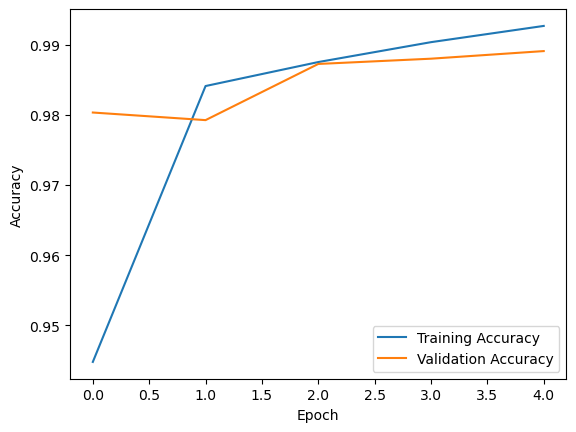

In [7]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

##### __Explanation__:

- Plots the accuracy over epochs.

- Helps us understand how well the model is learning.

## Display Sample Predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


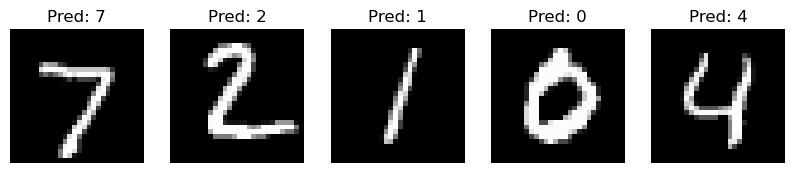

In [8]:
num_samples = 5
sample_images = X_test[:num_samples]
sample_labels = y_test[:num_samples]
predictions = np.argmax(model.predict(sample_images), axis=1)

plt.figure(figsize=(10, 2))
for i in range(num_samples):
    plt.subplot(1, num_samples, i +1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predictions[i]}")
    plt.axis('off')
plt.show()

##### __Explanation__:

- Selects __5 sample images__ from the test set.

- Uses the trained model to predict the digit.

- Plots images along with their predicted labels.